# Preprocessing
### we create silence files, pad short files and make training and validation sets

In [4]:
import numpy as np
import librosa
import librosa.display
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import soundfile as sf

In [71]:
%cd /dev/shm/kmrozowski/

/dev/shm/kmrozowski


In [16]:
test_dir = './data/test/audio/' #download files from kaggle

## Plot a wav file

min:  -0.5909424 
max:  0.36120605 
mean:  -0.00036393356 
median:  0.00018310547 
variance:  0.009011122 
length:  16000


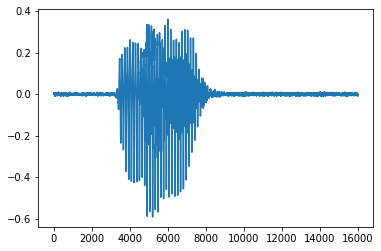

In [18]:
x, r = librosa.load(test_dir + 'clip_000044442.wav', sr = 16000)
print('min: ',np.min(x), 
      '\nmax: ', np.max(x), 
      '\nmean: ', np.mean(x),
      '\nmedian: ', np.median(x),
      '\nvariance: ', np.var(x),
      '\nlength: ', len(x))
plt.plot(x)

## Turning all wav files into spectrograms

In [19]:
def make_spec(file, file_dir = test_dir, flip = False, ps = False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    sig, rate = librosa.load(file_dir + file, sr = 16000)
    if len(sig) < 16000: # pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], n_fft = 512, 
                                             hop_length = 128, 
                                             center = False), ref = np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels = 85).T
    if flip:
        S = np.flipud(S)
    return S.astype(np.float32)

/mnt/evafs/faculty/home/kmrozowski/rl2/inkub-env/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


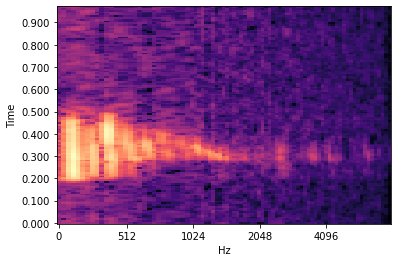

In [20]:
librosa.display.specshow(make_spec('clip_000044442.wav'), 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [21]:
make_spec('clip_000044442.wav').shape

(122, 85)

In [36]:
test_list = []
files = os.listdir(test_dir)
for i, f in enumerate(files):
   test_list.append(f)

In [47]:
path = '/mnt/evafs/faculty/home/kmrozowski/rl2/wut-mini-deep-learning/speech-recognition/data/'
np.savetxt(path + 'test_list.csv',test_list, delimiter =" ",  fmt ='% s') 

In [24]:
def create_sets(file_list = test_list):
    X_array = np.zeros([len(file_list),122,85])
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file)
        try:
            X_array[ind] = make_spec(file)
        except ValueError:
            print(ind, file, ValueError)
    return X_array

In [25]:
def print_sets(file_list = test_list):
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file, file.rsplit('/')[0])
print_sets()

0 clip_ffffc7358.wav clip_ffffc7358.wav
2000 clip_fcb8fc8b4.wav clip_fcb8fc8b4.wav
4000 clip_f97ffaf56.wav clip_f97ffaf56.wav
6000 clip_f642440a1.wav clip_f642440a1.wav
8000 clip_f2f2b0120.wav clip_f2f2b0120.wav
10000 clip_efa61c066.wav clip_efa61c066.wav
12000 clip_ec5abc3ab.wav clip_ec5abc3ab.wav
14000 clip_e90858d25.wav clip_e90858d25.wav
16000 clip_e5cdea912.wav clip_e5cdea912.wav
18000 clip_e297b7bd9.wav clip_e297b7bd9.wav
20000 clip_df59f4309.wav clip_df59f4309.wav
22000 clip_dc2cc1e56.wav clip_dc2cc1e56.wav
24000 clip_d8e6ea8f1.wav clip_d8e6ea8f1.wav
26000 clip_d5bc40baf.wav clip_d5bc40baf.wav
28000 clip_d268907eb.wav clip_d268907eb.wav
30000 clip_cf1bdd4a0.wav clip_cf1bdd4a0.wav
32000 clip_cbebfd8f7.wav clip_cbebfd8f7.wav
34000 clip_c8b3138d4.wav clip_c8b3138d4.wav
36000 clip_c58aeb44a.wav clip_c58aeb44a.wav
38000 clip_c2423daeb.wav clip_c2423daeb.wav
40000 clip_beece7d69.wav clip_beece7d69.wav
42000 clip_bb9cd375e.wav clip_bb9cd375e.wav
44000 clip_b852b470a.wav clip_b852b470a.

In [26]:
X_test = create_sets() # takes a while

0 clip_ffffc7358.wav


/mnt/evafs/faculty/home/kmrozowski/rl2/inkub-env/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


2000 clip_fcb8fc8b4.wav
4000 clip_f97ffaf56.wav
6000 clip_f642440a1.wav
8000 clip_f2f2b0120.wav
10000 clip_efa61c066.wav
12000 clip_ec5abc3ab.wav
14000 clip_e90858d25.wav
16000 clip_e5cdea912.wav
18000 clip_e297b7bd9.wav
20000 clip_df59f4309.wav
22000 clip_dc2cc1e56.wav
24000 clip_d8e6ea8f1.wav
26000 clip_d5bc40baf.wav
28000 clip_d268907eb.wav
30000 clip_cf1bdd4a0.wav
32000 clip_cbebfd8f7.wav
34000 clip_c8b3138d4.wav
36000 clip_c58aeb44a.wav
38000 clip_c2423daeb.wav
40000 clip_beece7d69.wav
42000 clip_bb9cd375e.wav
44000 clip_b852b470a.wav
46000 clip_b519f891e.wav
48000 clip_b1d4df4fe.wav
50000 clip_aeb10385f.wav
52000 clip_ab683e0a3.wav
54000 clip_a83cf661c.wav
56000 clip_a515b3a8e.wav
58000 clip_a201a6ab0.wav
60000 clip_9ebf5c435.wav
62000 clip_9b8050db4.wav
64000 clip_984a3992e.wav
66000 clip_952d66021.wav
68000 clip_91e66a1dc.wav
70000 clip_8edfc3ac2.wav
72000 clip_8b9bca122.wav
74000 clip_8862d5725.wav
76000 clip_8544f5176.wav
78000 clip_820c8282c.wav
80000 clip_7ed2c1648.wav
8200

In [27]:
X_test.shape

(158538, 122, 85)

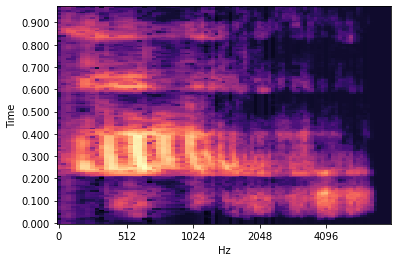

In [28]:
librosa.display.specshow(X_test[6500], 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

## Histogram of trainset values

In [32]:
print('min: ',np.min(X_test), 
      '\nmax: ', np.max(X_test), 
      '\nmean: ', np.mean(X_test),
      '\nmedian: ', np.median(X_test),
      '\nvariance: ', np.var(X_test))
# train:
# min:  -2.0306179523468018 
# max:  9.682740653715882e-08 
# mean:  -1.3092463950993087 
# median:  -1.3604838848114014 
# variance:  0.19674540582019645

#test:

min:  -2.0306179523468018 
max:  9.682740653715882e-08 
mean:  -1.280862463509934 
median:  -1.379961609840393 
variance:  0.27358904585547383


(array([4.23223400e+06, 5.45878000e+05, 1.17455430e+07, 2.70620530e+07,
        2.76816683e+08, 7.03412210e+07, 4.68053270e+07, 4.47076230e+07,
        3.98821760e+07, 3.88814790e+07, 3.88895020e+07, 3.98334910e+07,
        4.16654660e+07, 4.41678190e+07, 4.67771350e+07, 4.86262250e+07,
        4.90924790e+07, 4.79836850e+07, 4.57134000e+07, 4.28272190e+07,
        3.97605250e+07, 3.67059830e+07, 3.39317350e+07, 3.15515130e+07,
        2.96711000e+07, 2.82290440e+07, 2.70815690e+07, 2.60411230e+07,
        2.49225330e+07, 2.37367300e+07, 2.25803270e+07, 2.15790370e+07,
        2.07317170e+07, 1.99839770e+07, 1.93424470e+07, 1.88017860e+07,
        1.83355780e+07, 1.78406900e+07, 1.74727890e+07, 1.73985150e+07,
        1.77964030e+07, 1.86415930e+07, 1.87953610e+07, 1.66167900e+07,
        1.24235550e+07, 8.30590300e+06, 5.17884100e+06, 3.07787900e+06,
        1.72029100e+06, 3.91870880e+07]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.8681685

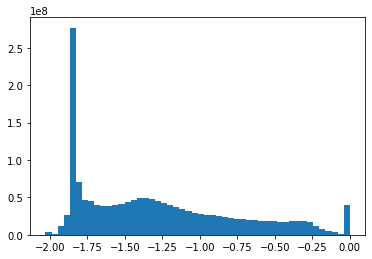

In [33]:
plt.hist(X_test.flatten(), bins = 50)

### save the training sets, add channel dimension for keras, normalize around zero

In [34]:
X_train_mean = -1.3092463950993087
np.save('data/X_test.npy', np.expand_dims(X_test, -1) + X_train_mean)